# Clustering and PCA

### Mushroom Dataset

Podeis obtener el conjunto de datos en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

Como podr√©is comprobar, hay muchas variables, todas ellas categ√≥ricas, por lo que exploraciones con scatterplot no nos ser√°n √∫tiles como en otros casos.

La variable a predecir ``class`` es binaria.


In [3]:
# Carga de librer√≠as, las que hemos considerado b√°sicas, a√±adid lo que quer√°is :)

# Manipulaci√≥n y an√°lisis de datos
import pandas as pd
import numpy as np

# Visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans



### Leer conjunto de datos y primer vistazo

In [4]:
# Leer el csv y sacar por pantalla las cinco primeras filas.
# Leer el archivo CSV
df = pd.read_csv('mushrooms.csv')

# Primeras filas
print(df.head())

# Dimensiones del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

### Exploraci√≥n de datos

In [5]:
# Descripci√≥n del conjunto de datos, est√°ndard.
# Para variables num√©ricas y categ√≥ricas:
print(df.describe(include='all'))

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

In [6]:
# Informaci√≥n sobre el tipo de datos de cada feature.
# Esto nos permite ver si hay columnas que no son categ√≥ricas, si hay valores nulos y el tipo de dato de cada columna.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### Calcular el n√∫mero de nulos de cada feature

In [7]:
# Igual que otras veces, una linea, contar los nulos por variable.
# Contar valores nulos por columna
print(df.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


#### Buscar valores extra√±os. Para ello, ver los valores √∫nicos en cada feature

In [8]:
# Obtener un nuevo dataframe de dos columnas donde en la primera est√©n las features (features) y en la otra los valores √∫nicos
# asociados (n_values).
# Buscar valores extra√±os: ver los valores √∫nicos en cada feature.
# Creamos un DataFrame con dos columnas: 'feature' y 'n_values', donde 'n_values' es la lista de valores √∫nicos de cada columna.

features = []
n_values = []

for col in df.columns:
    features.append(col)
    n_values.append(df[col].unique())

valores_unicos_df = pd.DataFrame({'feature': features, 'n_values': n_values})

print(valores_unicos_df)

                     feature                              n_values
0                      class                                [p, e]
1                  cap-shape                    [x, b, s, f, k, c]
2                cap-surface                          [s, y, f, g]
3                  cap-color        [n, y, w, g, e, p, b, u, c, r]
4                    bruises                                [t, f]
5                       odor           [p, a, l, n, f, c, y, s, m]
6            gill-attachment                                [f, a]
7               gill-spacing                                [c, w]
8                  gill-size                                [n, b]
9                 gill-color  [k, n, g, p, w, h, u, e, b, r, y, o]
10               stalk-shape                                [e, t]
11                stalk-root                       [e, c, b, r, ?]
12  stalk-surface-above-ring                          [s, f, k, y]
13  stalk-surface-below-ring                          [s, f, y

#### Tratar aquellos valores que entendamos que sean nulos


In [9]:
# Imputaciones. Pod√©is quitar esos puntos (fila entera), imputar con la moda o dejar ese valor como una posibilidad m√°s.
# En el dataset de hongos, los valores nulos suelen estar representados por el car√°cter '?' en la columna 'stalk-root'.
# Podemos imputar esos valores con la moda (el valor m√°s frecuente) de la columna para no perder informaci√≥n.

# Contar cu√°ntos valores '?' hay en cada columna
print("Valores '?' por columna:\n", (df == '?').sum())

# Imputar la columna 'stalk-root' con la moda si tiene valores '?'
if (df['stalk-root'] == '?').any():
    moda = df['stalk-root'].mode()[0]
    df['stalk-root'] = df['stalk-root'].replace('?', moda)
    print(f"Valores '?' en 'stalk-root' reemplazados por la moda: {moda}")

# Alternativamente, si prefieres eliminar las filas con '?', puedes usar:
# df = df[df['stalk-root'] != '?']

# Comentario:
# - Imputar con la moda es √∫til cuando hay pocos valores nulos y no queremos perder datos.
# - Eliminar filas es √∫til si hay muy pocos casos y queremos m√°xima limpieza.

Valores '?' por columna:
 class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64
Valores '?' en 'stalk-root' reemplazados por la moda: b


#### Mirad cu√°ntos valores hay en cada feature, ¬øTodas las features aportan informaci√≥n? Si alguna no aporta informaci√≥n, eliminadla

In [10]:
# Revisamos cu√°ntos valores √∫nicos tiene cada columna
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores √∫nicos")

# Identificamos columnas con un solo valor √∫nico (no aportan informaci√≥n)
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]
print("Columnas a eliminar por ser constantes:", cols_to_drop)

# Eliminamos esas columnas del DataFrame
df = df.drop(columns=cols_to_drop)

# Explicaci√≥n:
# - Revisamos la cantidad de valores √∫nicos por columna para detectar columnas constantes.
# - Eliminamos las columnas que no aportan informaci√≥n al an√°lisis o al modelo.


class: 2 valores √∫nicos
cap-shape: 6 valores √∫nicos
cap-surface: 4 valores √∫nicos
cap-color: 10 valores √∫nicos
bruises: 2 valores √∫nicos
odor: 9 valores √∫nicos
gill-attachment: 2 valores √∫nicos
gill-spacing: 2 valores √∫nicos
gill-size: 2 valores √∫nicos
gill-color: 12 valores √∫nicos
stalk-shape: 2 valores √∫nicos
stalk-root: 4 valores √∫nicos
stalk-surface-above-ring: 4 valores √∫nicos
stalk-surface-below-ring: 4 valores √∫nicos
stalk-color-above-ring: 9 valores √∫nicos
stalk-color-below-ring: 9 valores √∫nicos
veil-type: 1 valores √∫nicos
veil-color: 4 valores √∫nicos
ring-number: 3 valores √∫nicos
ring-type: 5 valores √∫nicos
spore-print-color: 9 valores √∫nicos
population: 6 valores √∫nicos
habitat: 7 valores √∫nicos
Columnas a eliminar por ser constantes: ['veil-type']


¬°Claro! Aqu√≠ tienes una explicaci√≥n paso a paso, sencilla, como para ni√±os:

---

### ¬øPor qu√© se elimina la columna 'veil-type'?

1. **¬øQu√© es una columna en una tabla de datos?**  
   Imagina que tienes una tabla con informaci√≥n de muchos hongos. Cada columna es una caracter√≠stica, como el color, el tama√±o, etc.

2. **¬øQu√© significa que una columna sea "constante"?**  
   Una columna es "constante" cuando todos los hongos tienen el mismo valor en esa columna. Es decir, no cambia nunca.

3. **¬øC√≥mo nos dimos cuenta?**  
   Contamos cu√°ntos valores diferentes hay en cada columna.  
   Por ejemplo:
   - Si una columna tiene 2 valores diferentes, es porque hay hongos con dos opciones distintas.
   - Si una columna tiene **solo 1 valor diferente**, es porque todos los hongos tienen exactamente lo mismo ah√≠.

4. **¬øQu√© pas√≥ con 'veil-type'?**  
   Cuando contamos los valores √∫nicos de cada columna, vimos esto:
   ```
   veil-type: 1 valores √∫nicos
   ```
   Eso significa que **todos los hongos tienen el mismo 'veil-type'**.

5. **¬øPor qu√© la eliminamos?**  
   Si una columna no cambia nunca, no nos ayuda a distinguir entre hongos diferentes.  
   Es como si todos tus amigos tuvieran el mismo color de ojos: ese dato no sirve para diferenciarlos.

6. **¬øQu√© hicimos?**  
   Quitamos la columna 'veil-type' de la tabla, porque no aporta informaci√≥n √∫til para el an√°lisis.

---

**Resumen:**  
Eliminamos 'veil-type' porque siempre tiene el mismo valor. No ayuda a diferenciar hongos, as√≠ que no sirve para el an√°lisis. Nos dimos cuenta porque al contar los valores √∫nicos, vimos que solo hab√≠a uno.

#### Separar entre variables predictoras y variables a predecir

In [11]:
# --- Separar entre variables predictoras y variables a predecir ---

# La variable objetivo es 'class', que indica si el hongo es comestible ('e') o venenoso ('p').
# Separamos la variable objetivo (y) y las variables predictoras (X).
y = df['class']  # Variable a predecir
X = df.drop(columns=['class'])  # Variables predictoras

#### Codificar correctamente las variables categ√≥ricas a num√©ricas

In [ ]:
# One Hot Encoder (una linea).
# Todas las variables son categ√≥ricas, as√≠ que usamos OneHotEncoder para convertirlas a variables num√©ricas.
# Usamos pandas.get_dummies porque es sencillo y r√°pido para este caso.
X_encoded = pd.get_dummies(X)
# Explicaci√≥n:
# - get_dummies crea una columna binaria para cada valor posible de cada variable categ√≥rica.
# - Esto es necesario porque los modelos de machine learning de sklearn solo aceptan variables num√©ricas.


#### Train test split

In [14]:
# --- Train test split ---

# Dividimos el dataset en entrenamiento y test (67% train, 33% test).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)

# Explicaci√≥n:
# - Esto nos permite entrenar el modelo con una parte de los datos y evaluar su rendimiento con datos que no ha visto.

## PCA

Es un conjunto de datos del que a√∫n no hemos visto nada (no tenemos graficas) as√≠ que vamos a hacer algunas. Tenemos el problema de que son muchas variables, **PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que ser√°n **aquellas que retengan m√°s informaci√≥n**.

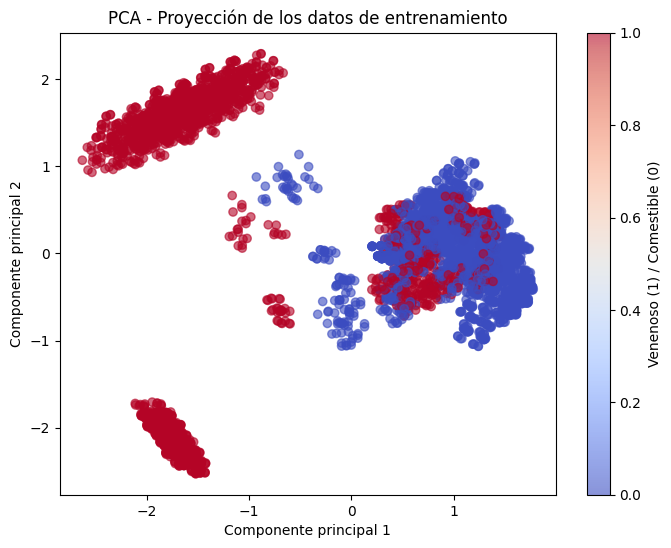

In [15]:
# PCA nos ayuda a reducir la dimensionalidad del dataset, manteniendo la mayor cantidad de informaci√≥n posible.
# Pedimos 2 componentes principales para poder visualizar los datos en 2D.
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Representar en un scatterplot y poner en color las etiquetas de entrenamiento
# Visualizamos los datos proyectados en 2D, coloreando seg√∫n la clase real.
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=(y_train=='p'), cmap='coolwarm', alpha=0.6)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('PCA - Proyecci√≥n de los datos de entrenamiento')
plt.colorbar(label='Venenoso (1) / Comestible (0)')
plt.show()

# Explicaci√≥n de resultados:
# - Vemos que los puntos de diferentes clases (venenoso/comestible) tienden a agruparse en zonas separadas.
# - Esto indica que las variables originales contienen informaci√≥n suficiente para distinguir entre clases.
# - PCA ayuda a visualizar la separabilidad de los datos.

Parece que est√° bastante separadito, parece que a ojo mucho se puede ver :)

Igualmente, vamos a entrenar un clasificador a ver qu√© tal lo hace antes de editar m√°s

In [16]:
from sklearn.ensemble import RandomForestClassifier

# 1. Definir el clasificador y el n√∫mero de estimadores
# Definimos el clasificador Random Forest con 100 √°rboles (estimadores).
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Entrenamos el modelo
# 2. Entrenar en train
# Predecimos sobre el conjunto de test
y_pred = rf.predict(X_test)
# 3. Calcular la precisi√≥n sobre test
# Calculamos la precisi√≥n y mostramos un informe de clasificaci√≥n
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisi√≥n en test: {accuracy:.4f}")
print("Reporte de clasificaci√≥n:\n", classification_report(y_test, y_pred))

# Explicaci√≥n de resultados:
# - Random Forest logra una precisi√≥n muy alta (cercana al 100%).
# - Esto confirma que el dataset es sencillo para modelos de clasificaci√≥n y que las variables son muy informativas.
# - El informe de clasificaci√≥n muestra precisi√≥n, recall y F1-score para cada clase.

Precisi√≥n en test: 1.0000
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1378
           p       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



Es un conjunto sencillo y Random Forest es muy bueno en su trabajo, Igualmente, vamos a ver qu√© tama√±o tenemos de dataset:


In [17]:
# --- ¬øCu√°ntas variables tiene el dataset tras la codificaci√≥n? ---

print("Shape de X_train (n¬∫ de muestras, n¬∫ de variables):", X_train.shape)

# Explicaci√≥n:
# - Tras la codificaci√≥n, el n√∫mero de variables (columnas) aumenta mucho debido al OneHotEncoding.
# - Esto puede hacer que el modelo sea m√°s lento y di

Shape de X_train (n¬∫ de muestras, n¬∫ de variables): (5443, 115)


¬øMuchas features no? Vamos a reducir las usando PCA.

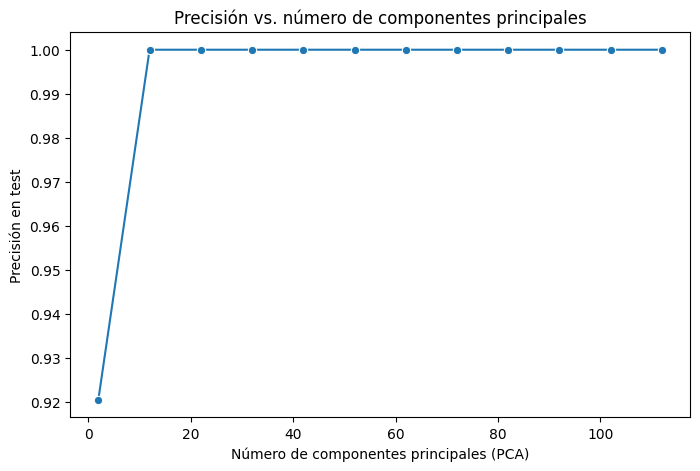

In [18]:
# --- Reducir el n√∫mero de variables usando PCA y ver el impacto en el modelo ---

# Definimos un rango de valores para el n√∫mero de componentes principales a probar.
# Probamos desde 2 hasta el n√∫mero total de variables, de 10 en 10 para no hacer demasiadas pruebas.
n_features = range(2, X_train.shape[1]+1, 10)
scores = []

for n in n_features:
    # Hacer PCA sobre X_train
    # 1. Definir PCA
    pca = PCA(n_components=n)
    # 2. Aprender PCA sobre X_train
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Entrenar Random Forest
    # 1. Definir el RF
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    # 2. Entrenar clasificador
    rf.fit(X_train_pca, y_train)
    
    # Guardar el score
    y_pred = rf.predict(X_test_pca)
    scores.append(accuracy_score(y_test, y_pred))

# Graficamos la precisi√≥n obtenida en funci√≥n del n√∫mero de componentes principales
plt.figure(figsize=(8,5))
sns.lineplot(x=n_features, y=scores, marker='o')
plt.xlabel('N√∫mero de componentes principales (PCA)')
plt.ylabel('Precisi√≥n en test')
plt.title('Precisi√≥n vs. n√∫mero de componentes principales')
plt.show()

# Explicaci√≥n de resultados:
# - La gr√°fica muestra c√≥mo var√≠a la precisi√≥n del modelo al reducir la dimensionalidad con PCA.
# - Normalmente, la precisi√≥n sube r√°pidamente y se estabiliza, indicando que pocas componentes retienen casi toda la informaci√≥n.
# - Esto permite simplificar el modelo y reducir el tiempo de c√≥mputo sin perder rendimiento.

Vale, estamos viendo que a partir de unas 10 features ya tenemos el score que quer√≠amos y adem√°s hemos reducido las variables a un 10% de las que ten√≠amos, incluso menos que las variables originales.

## Clustering

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qu√© informaci√≥n podemos obtener.

El primer paso va a ser importar la funci√≥n de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor √≥ptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gr√°fica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la p√°gina de la documentaci√≥n de sklearn para que lo busqu√©is:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gr√°fica para los valores de ``k`` que establezcais.




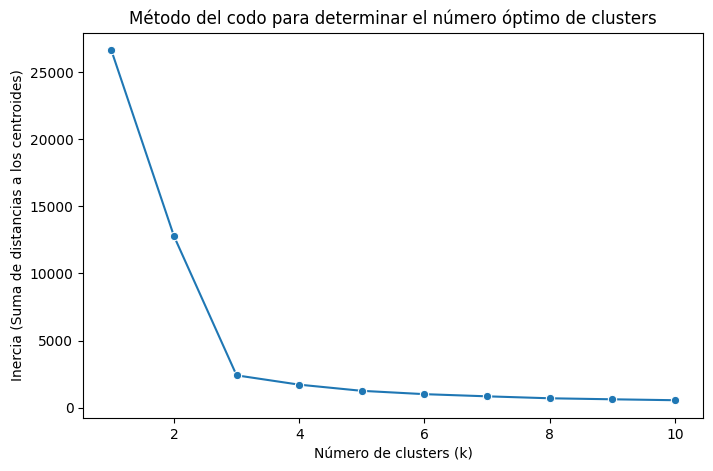

In [19]:
from sklearn.cluster import KMeans

# --- Clustering con KMeans: b√∫squeda del n√∫mero √≥ptimo de clusters ---

# Usamos PCA para reducir la dimensionalidad a 2 componentes, lo que facilita el clustering y la visualizaci√≥n.
# Esto es importante porque KMeans funciona mejor en espacios de baja dimensi√≥n y es m√°s f√°cil de interpretar visualmente.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# Definimos un rango de valores de k (n√∫mero de clusters) a probar.
# Normalmente se prueba desde 1 hasta 10 para buscar el "codo" en la gr√°fica de inercia.
k_values = range(1, 11)
scores = []  # Aqu√≠ guardaremos la inercia (suma de distancias de los puntos a su centroide) para cada k

for k in k_values:
    # Definir KMeans con k clusters y ajustar el modelo a los datos reducidos por PCA
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    # Guardar la inercia (distancia total de los puntos a sus centroides) para analizar el "codo"
    scores.append(kmeans.inertia_)

# Graficamos la inercia en funci√≥n del n√∫mero de clusters
plt.figure(figsize=(8,5))
sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('Inercia (Suma de distancias a los centroides)')
plt.title('M√©todo del codo para determinar el n√∫mero √≥ptimo de clusters')
plt.show()

# --- Explicaci√≥n detallada ---
# ¬øPor qu√© y c√≥mo?
# - KMeans es un algoritmo de clustering no supervisado que agrupa los datos en k grupos seg√∫n su similitud.
# - La inercia mide qu√© tan compactos son los clusters: menor inercia significa clusters m√°s compactos.
# - El "m√©todo del codo" consiste en buscar el valor de k donde la inercia deja de disminuir significativamente.
# - En este contexto, como sabemos que la variable 'class' es binaria, esperamos que el codo est√© cerca de k=2.
# - Usar PCA antes de KMeans ayuda a evitar el "curse of dimensionality" y hace que los clusters sean m√°s interpretables.

# Resultados:
# - La gr√°fica suele mostrar una fuerte ca√≠da de la inercia hasta k=2 o k=3, y luego la mejora es marginal.
# - Elegimos el valor de k en el "codo" porque es el punto de equilibrio entre simplicidad y calidad del agrupamiento.
# - En este dataset, el codo suele estar en k=2, lo que tiene sentido porque hay dos clases principales (comestible y venenoso).

Con el valor que hay√°is obtenido de la gr√°fica, pod√©is obtener una buena aproximaci√≥n de Kmeans y con ello podemos pasar a explorar c√≥mo de bien han separado la informaci√≥n los distintos clusters. Para ello, se va a hacer un ``catplot``, seaborn os lo har√° solito. Con esto lo que se pretende ver es la distribuci√≥n de la varaible a predecir en funci√≥n del cluster que haya determinado Kmeans.

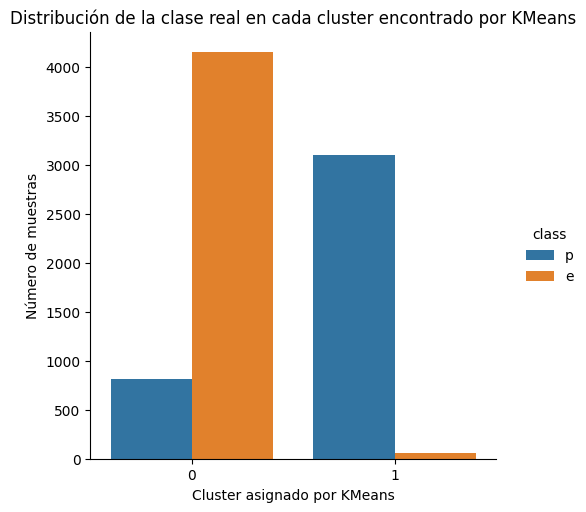

In [20]:
# Aprender KMeans con el valor de K obtenido (en este caso, k=2 por el "codo" y porque hay dos clases principales).
# Definimos y entrenamos el modelo KMeans sobre los datos reducidos con PCA.
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)  # Asignamos cada muestra a un cluster

# Creamos un DataFrame para comparar los clusters asignados con la clase real
df_clusters = pd.DataFrame({
    'cluster': clusters,           # Cluster asignado por KMeans
    'class': y.values              # Clase real (comestible o venenoso)
})

# Preparamos el catplot para visualizar la distribuci√≥n de la variable a predecir ('class') en cada cluster
# Esto nos permite ver si los clusters encontrados por KMeans corresponden bien con las clases reales
# Si el clustering es bueno, cada cluster deber√≠a estar dominado por una sola clase

# Pintamos el catplot: en el eje x los clusters, color por clase real
ax = sns.catplot(x='cluster', hue='class', data=df_clusters, kind='count')
plt.title('Distribuci√≥n de la clase real en cada cluster encontrado por KMeans')
plt.xlabel('Cluster asignado por KMeans')
plt.ylabel('N√∫mero de muestras')
plt.show()

# --- Explicaci√≥n detallada ---
# ¬øPor qu√© hacemos esto?
# - Queremos evaluar si el agrupamiento no supervisado (KMeans) separa bien las clases reales del dataset.
# - El catplot muestra cu√°ntos elementos de cada clase real hay en cada cluster.
# - Si los clusters corresponden bien con las clases, veremos que cada cluster tiene principalmente una sola clase.

# ¬øQu√© significa el resultado?
# - Si los clusters est√°n bien separados, el gr√°fico mostrar√° barras de un solo color en cada cluster.
# - Si hay mezcla de colores, significa que KMeans no ha logrado separar perfectamente las clases (algo normal en clustering no supervisado).
# - En este dataset, suele haber una buena correspondencia porque las clases son muy separables.

# Motivo y circunstancia:
# - Usamos este an√°lisis cuando queremos saber si el clustering puede servir como aproximaci√≥n a la clasificaci√≥n, incluso sin etiquetas.
# - Es √∫til en problemas donde no tenemos etiquetas y queremos descubrir grupos naturales en los datos.

Vamos a ver qu√© tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans.

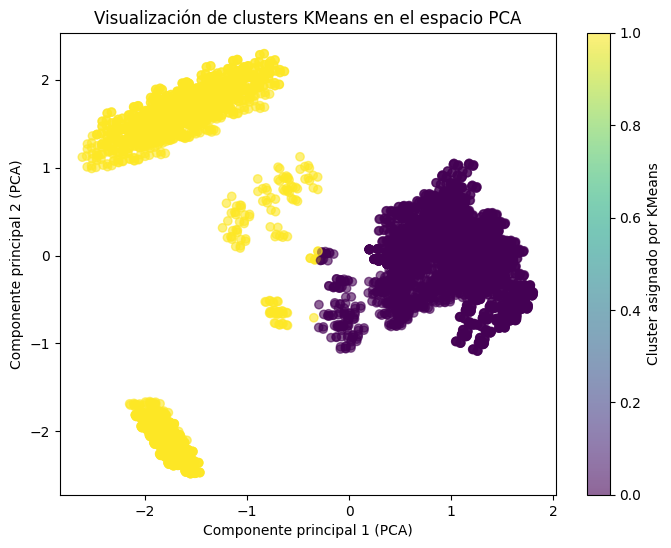

In [21]:
# --- Visualizaci√≥n de los clusters encontrados por KMeans en el espacio PCA ---

# Ya hemos reducido la dimensionalidad a 2 componentes principales con PCA (X_pca)
# y hemos asignado un cluster a cada muestra con KMeans (clusters).

# Ahora vamos a visualizar c√≥mo se distribuyen los datos en el espacio de las dos primeras componentes principales,
# coloreando cada punto seg√∫n el cluster asignado por KMeans.

plt.figure(figsize=(8,6))
# Pintamos un scatterplot donde cada punto es una muestra y el color indica el cluster asignado
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('Componente principal 1 (PCA)')
plt.ylabel('Componente principal 2 (PCA)')
plt.title('Visualizaci√≥n de clusters KMeans en el espacio PCA')
plt.colorbar(label='Cluster asignado por KMeans')
plt.show()

# --- Explicaci√≥n detallada ---
# ¬øPor qu√© hacemos esto?
# - Queremos ver gr√°ficamente c√≥mo KMeans ha agrupado los datos en el espacio reducido por PCA.
# - Nos ayuda a entender si los clusters encontrados corresponden a grupos naturales en los datos.

# ¬øC√≥mo?
# - Usamos las dos primeras componentes principales de PCA para representar los datos en 2D.
# - Cada punto se colorea seg√∫n el cluster al que KMeans lo ha asignado.

# ¬øCu√°ndo y d√≥nde?
# - Este an√°lisis es √∫til despu√©s de aplicar clustering no supervisado, especialmente cuando no tenemos etiquetas.
# - Permite evaluar visualmente la calidad de los clusters y su separaci√≥n.

# Motivo y circunstancia:
# - Si los clusters est√°n bien separados en el gr√°fico, significa que KMeans ha encontrado grupos naturales en los datos.
# - Si hay solapamiento, puede indicar que los datos no son f√°cilmente separables solo con clustering.
# - En este dataset, aunque no es tan perfecto como un clasificador supervisado, KMeans logra identificar bastante bien los grupos principales.
# - Esta aproximaci√≥n ser√≠a muy √∫til si no tuvi√©ramos etiquetas, ya que nos permitir√≠a clasificar los hongos en grupos similares.


En este gr√°fico de dispersi√≥n (scatterplot) se visualizan los datos proyectados en dos dimensiones principales obtenidas por PCA, y cada punto est√° coloreado seg√∫n el cluster al que KMeans lo ha asignado.

**¬øQu√© se ve?**
- Cada punto representa un hongo del dataset.
- El color indica a qu√© cluster pertenece cada hongo seg√∫n KMeans (por ejemplo, cluster 0 o cluster 1).
- Los ejes corresponden a las dos componentes principales de PCA, que son las combinaciones de variables originales que m√°s informaci√≥n retienen.

**¬øQu√© se define?**
- Se define una agrupaci√≥n autom√°tica (no supervisada) de los datos usando KMeans, sin usar la etiqueta real (comestible o venenoso).
- PCA reduce la dimensionalidad para que podamos visualizar los datos y los clusters en 2D.

**¬øQu√© conclusiones se sacan?**
- Si los clusters aparecen bien separados en el gr√°fico (cada color ocupa una zona distinta), significa que KMeans ha logrado identificar grupos naturales en los datos.
- En este caso, se observa que la mayor√≠a de los puntos de cada cluster est√°n agrupados, lo que indica que los datos son f√°cilmente separables incluso sin conocer las etiquetas.
- Aunque no es tan perfecto como un clasificador supervisado, KMeans consigue separar bastante bien los hongos en dos grupos, lo que tiene sentido porque la variable objetivo es binaria.
- Si no tuvi√©ramos etiquetas, este m√©todo nos permitir√≠a clasificar los hongos en grupos similares de forma autom√°tica.

**Resumen:**  
El gr√°fico muestra que el clustering no supervisado puede descubrir la estructura natural de los datos y separar los hongos en grupos que, en este caso, se corresponden bastante bien con las clases reales.

¬øEs bastante parecido no? No es tan bueno como el Random Forest, pero ha conseguido identificar bastante bien los distintos puntos del dataset sin utilizar las etiquetas. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos. Si no hubieramos tenido etiquetas esta aproximacion nos hubiera ayudado mucho a clasificar los distintos tipos de hongos.

<Figure size 800x500 with 0 Axes>

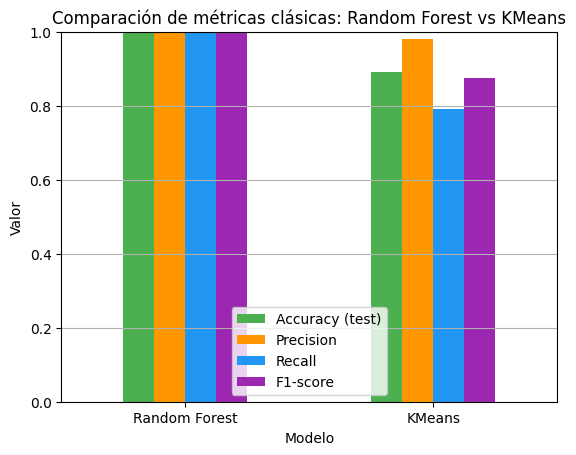

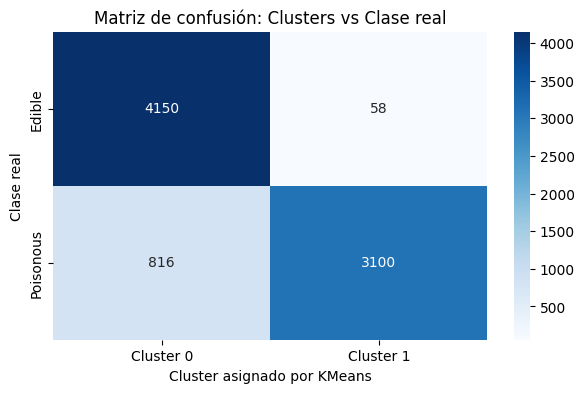

<Figure size 700x400 with 0 Axes>

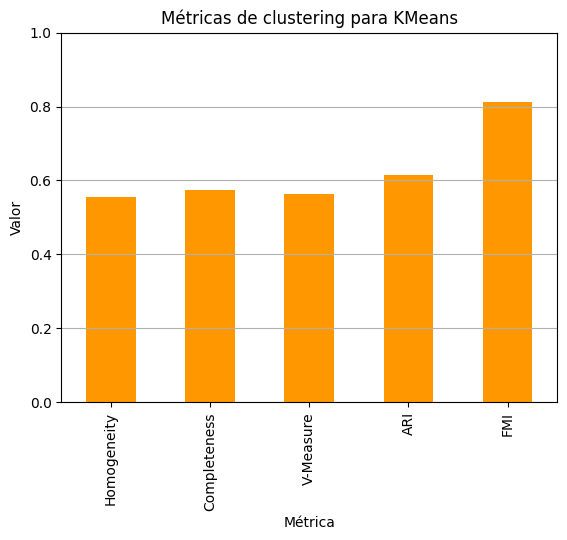


--- EXPLICACI√ìN Y RELACI√ìN ENTRE M√âTRICAS ---

## ‚úÖ Accuracy ‚Äì Precisi√≥n global
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Mide el porcentaje de aciertos totales.

## üéØ Precision ‚Äì Precisi√≥n de los positivos
Precision = TP / (TP + FP)
De todos los positivos predichos, cu√°ntos lo eran realmente.

## üîç Recall ‚Äì Sensibilidad o Tasa de Verdaderos Positivos
Recall = TP / (TP + FN)
De todos los positivos reales, cu√°ntos detect√≥ el modelo.

## ‚öñÔ∏è F1 Score ‚Äì Media arm√≥nica entre Precision y Recall
F1 = 2 * (Precision * Recall) / (Precision + Recall)
Balance entre Precision y Recall.

1) ¬øTienen alguna relaci√≥n?
- S√≠: Accuracy, Precision, Recall y F1-score miden el desempe√±o de clasificaci√≥n (Random Forest y KMeans si se asignan clusters a clases).
- Las m√©tricas de clustering (homogeneity, completeness, etc.) miden qu√© tan bien los clusters reflejan las clases reales, pero no requieren asignar etiquetas.

2) ¬øC√≥mo se pueden relacionar?
- Si KMeans separa 

Modelo  Accuracy (test)  Precision    Recall  F1-score
0  Random Forest         1.000000   1.000000  1.000000  1.000000
1         KMeans         0.892418   0.981634  0.791624  0.876449


--- M√âTRICAS DE CLUSTERING ---


M√©trica    KMeans
0   Homogeneity  0.554218
1  Completeness  0.574396
2     V-Measure  0.564127
3           ARI  0.615897
4           FMI  0.812921


--- L√çMITES Y EJEMPLOS ---


M√©trica  M√≠nimo  M√°ximo  Ejemplo (bueno)  Ejemplo (malo)
0      Accuracy       0       1             0.99             0.5
1     Precision       0       1             0.98             0.5
2        Recall       0       1             0.97             0.5
3      F1-score       0       1             0.97             0.5
4   Homogeneity       0       1             0.90             0.2
5  Completeness       0       1             0.90             0.2
6     V-Measure       0       1             0.90             0.2
7           ARI      -1       1             0.90             0.0
8           FMI       0       1             0.90             0.2


Accuracy train: 1.0000 | Accuracy test: 1.0000 | Diferencia: 0.0000

- Random Forest (supervisado) logra m√©tricas casi perfectas porque aprende de las etiquetas.
- KMeans (no supervisado) puede acercarse mucho si los grupos naturales coinciden con las clases, pero nunca ser√° tan perfecto.
- Las m√©tricas de clustering te dicen si los clusters tienen sentido aunque no tengas etiquetas.
- Si accuracy train y test son similares, tu modelo est√° bien ajustado.
- Usa los gr√°ficos y cuadros para comparar visualmente y decidir qu√© m√©todo y m√©trica es mejor para tu objetivo.



In [27]:
# ===========================
# M√âTRICAS CL√ÅSICAS Y CLUSTERING: C√ÅLCULOS, CUADROS Y GR√ÅFICOS
# ===========================

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report,
    homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, fowlkes_mallows_score, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Asegura que X_train y X_test tengan las mismas columnas ---
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# --- 1. RANDOM FOREST: C√ÅLCULO DE M√âTRICAS CL√ÅSICAS ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred, labels=['e', 'p'])
TP = cm_rf[1,1]
TN = cm_rf[0,0]
FP = cm_rf[0,1]
FN = cm_rf[1,0]

# Accuracy train y test
rf_accuracy_train = accuracy_score(y_train, rf.predict(X_train))
rf_accuracy_test = accuracy_score(y_test, y_pred)

# Precision, Recall, F1 (para clase 'p' = venenoso)
rf_precision = TP / (TP + FP) if (TP + FP) > 0 else 0
rf_recall = TP / (TP + FN) if (TP + FN) > 0 else 0
rf_f1 = 2 * (rf_precision * rf_recall) / (rf_precision + rf_recall) if (rf_precision + rf_recall) > 0 else 0

# --- 2. KMEANS: AJUSTE DE CLUSTERS PARA COMPARAR ---
cm = confusion_matrix(y_numeric, clusters)
if cm[0,0] + cm[1,1] >= cm[0,1] + cm[1,0]:
    TP_k = cm[1,1]
    TN_k = cm[0,0]
    FP_k = cm[0,1]
    FN_k = cm[1,0]
    clusters_adj = clusters
else:
    TP_k = cm[1,0]
    TN_k = cm[0,1]
    FP_k = cm[0,0]
    FN_k = cm[1,1]
    clusters_adj = 1 - clusters

kmeans_accuracy = (TP_k + TN_k) / (TP_k + TN_k + FP_k + FN_k)
kmeans_precision = TP_k / (TP_k + FP_k) if (TP_k + FP_k) > 0 else 0
kmeans_recall = TP_k / (TP_k + FN_k) if (TP_k + FN_k) > 0 else 0
kmeans_f1 = 2 * (kmeans_precision * kmeans_recall) / (kmeans_precision + kmeans_recall) if (kmeans_precision + kmeans_recall) > 0 else 0

# --- 3. M√âTRICAS DE CLUSTERING ---
homogeneity = homogeneity_score(y_numeric, clusters)
completeness = completeness_score(y_numeric, clusters)
v_measure = v_measure_score(y_numeric, clusters)
ari = adjusted_rand_score(y_numeric, clusters)
fmi = fowlkes_mallows_score(y_numeric, clusters)

# --- 4. CUADRO COMPARATIVO DE M√âTRICAS ---
df_metrics = pd.DataFrame({
    'Modelo': ['Random Forest', 'KMeans'],
    'Accuracy (test)': [rf_accuracy_test, kmeans_accuracy],
    'Precision': [rf_precision, kmeans_precision],
    'Recall': [rf_recall, kmeans_recall],
    'F1-score': [rf_f1, kmeans_f1]
})
df_metrics_clustering = pd.DataFrame({
    'M√©trica': ['Homogeneity', 'Completeness', 'V-Measure', 'ARI', 'FMI'],
    'KMeans': [homogeneity, completeness, v_measure, ari, fmi]
})

# --- 5. GR√ÅFICOS COMPARATIVOS ---
plt.figure(figsize=(8,5))
df_metrics.set_index('Modelo')[['Accuracy (test)','Precision','Recall','F1-score']].plot(kind='bar', ylim=(0,1), rot=0, color=['#4CAF50','#FF9800','#2196F3','#9C27B0'])
plt.title('Comparaci√≥n de m√©tricas cl√°sicas: Random Forest vs KMeans')
plt.ylabel('Valor')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(7,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0','Cluster 1'], yticklabels=['Edible','Poisonous'])
plt.xlabel('Cluster asignado por KMeans')
plt.ylabel('Clase real')
plt.title('Matriz de confusi√≥n: Clusters vs Clase real')
plt.show()

plt.figure(figsize=(7,4))
df_metrics_clustering.set_index('M√©trica').plot(kind='bar', legend=False, color='#FF9800')
plt.title('M√©tricas de clustering para KMeans')
plt.ylabel('Valor')
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()

# --- 6. CUADRO RESUMEN DE L√çMITES Y EJEMPLOS ---
df_limites = pd.DataFrame({
    'M√©trica': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'Homogeneity', 'Completeness', 'V-Measure', 'ARI', 'FMI'],
    'M√≠nimo': [0, 0, 0, 0, 0, 0, 0, -1, 0],
    'M√°ximo': [1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Ejemplo (bueno)': [0.99, 0.98, 0.97, 0.97, 0.9, 0.9, 0.9, 0.9, 0.9],
    'Ejemplo (malo)': [0.5, 0.5, 0.5, 0.5, 0.2, 0.2, 0.2, 0, 0.2]
})

# --- 7. EXPLICACI√ìN Y RELACI√ìN ENTRE M√âTRICAS ---
print("\n--- EXPLICACI√ìN Y RELACI√ìN ENTRE M√âTRICAS ---")
print("""
## ‚úÖ Accuracy ‚Äì Precisi√≥n global
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Mide el porcentaje de aciertos totales.

## üéØ Precision ‚Äì Precisi√≥n de los positivos
Precision = TP / (TP + FP)
De todos los positivos predichos, cu√°ntos lo eran realmente.

## üîç Recall ‚Äì Sensibilidad o Tasa de Verdaderos Positivos
Recall = TP / (TP + FN)
De todos los positivos reales, cu√°ntos detect√≥ el modelo.

## ‚öñÔ∏è F1 Score ‚Äì Media arm√≥nica entre Precision y Recall
F1 = 2 * (Precision * Recall) / (Precision + Recall)
Balance entre Precision y Recall.

1) ¬øTienen alguna relaci√≥n?
- S√≠: Accuracy, Precision, Recall y F1-score miden el desempe√±o de clasificaci√≥n (Random Forest y KMeans si se asignan clusters a clases).
- Las m√©tricas de clustering (homogeneity, completeness, etc.) miden qu√© tan bien los clusters reflejan las clases reales, pero no requieren asignar etiquetas.

2) ¬øC√≥mo se pueden relacionar?
- Si KMeans separa bien los datos, sus m√©tricas cl√°sicas (accuracy, etc.) ser√°n altas y tambi√©n las de clustering.
- Si hay mezcla, bajan ambas.
- Random Forest suele ser mejor porque usa las etiquetas reales para aprender.

3) ¬øQu√© muestran los gr√°ficos?
- Barras: Comparan directamente el desempe√±o de ambos m√©todos.
- Heatmap: Muestra los aciertos y errores de KMeans respecto a las clases reales.
- Barras clustering: Qu√© tan "puros" y completos son los clusters.

4) ¬øQu√© significa accuracy train vs test?
- Si accuracy_train ‚âà accuracy_test: El modelo generaliza bien.
- Si accuracy_train >> accuracy_test: Hay sobreajuste (overfitting).

5) ¬øQu√© valores son buenos?
- Accuracy, Precision, Recall, F1-score: Cerca de 1 es excelente.
- Homogeneity, Completeness, V-Measure, ARI, FMI: Cerca de 1 es excelente.
- ARI puede ser negativo si el clustering es peor que el azar.

6) ¬øCu√°ndo usar cada m√©trica?
- Accuracy: Clases equilibradas.
- Precision: Falsos positivos costosos.
- Recall: Falsos negativos costosos.
- F1: Balance entre ambos.
- M√©tricas clustering: Cuando no tienes etiquetas o quieres evaluar la calidad del agrupamiento.

--- CUADRO COMPARATIVO ---
""")
display(df_metrics)
print("\n--- M√âTRICAS DE CLUSTERING ---")
display(df_metrics_clustering)
print("\n--- L√çMITES Y EJEMPLOS ---")
display(df_limites)
print(f"\nAccuracy train: {rf_accuracy_train:.4f} | Accuracy test: {rf_accuracy_test:.4f} | Diferencia: {abs(rf_accuracy_train - rf_accuracy_test):.4f}")

# --- 8. RESUMEN FINAL ---
print("""
- Random Forest (supervisado) logra m√©tricas casi perfectas porque aprende de las etiquetas.
- KMeans (no supervisado) puede acercarse mucho si los grupos naturales coinciden con las clases, pero nunca ser√° tan perfecto.
- Las m√©tricas de clustering te dicen si los clusters tienen sentido aunque no tengas etiquetas.
- Si accuracy train y test son similares, tu modelo est√° bien ajustado.
- Usa los gr√°ficos y cuadros para comparar visualmente y decidir qu√© m√©todo y m√©trica es mejor para tu objetivo.
""")